When I first started learning Python a couple of years ago, I was looking for a simple case to test my newly acquired skills. The simulation of a [simple harmonic oscillator](https://en.wikipedia.org/wiki/Simple_harmonic_motion) using finite difference methods was the simplest problem I can think of with a bit of complexity, a sort of "Hello World!" on steroids. 

I have already discussed about the harmonic oscillator and the anatomy of a finite difference code in a [previous post](http://blog.albertotorin.it/blog/anatomy-fd-sho/). (You haven't read it? Go ahead, I'll wait... done?) Here, I will simply give my rendition of the algorithm (specifically using Python 3). 

<!-- TEASER_END -->

In [1]:
import numpy as np

def sho(f,sigma):
    # Set sampling rate
    SR = 44100
    # Set duration of simulation (in s)
    T = 1

    # Time step
    k = 1/SR
    # Number of time steps
    NF = int(np.floor(SR*T))
   
    # Frequency and loss parameter
    omega = 2*np.pi*f
    a0 = sigma * k
    
     # Check the stability condition    
    if k>(2/omega):
        print("Stability condition violated!")
        return
    
    # Initial conditions
    x0 = 1
    v0 = 0
    
    # Auxiliary coefficients
    B = (2-(omega**2 * k**2)) / (1 + a0)
    C = (1 - a0) / (1 + a0)
    
    # Initialise the system
    u0=x0
    u1=x0+k*v0

    # Initialise output
    out_u = []

    # Main Loop - Update
    for ii in range(1, NF):
        u = B*u1 - C*u0
        out_u.append(u)
        u0, u1 = u1, u
    
    return out_u


In [2]:
output = sho(10, 0.5)

To plot the output, you can simply load _matplotlib_ and create a new figure.

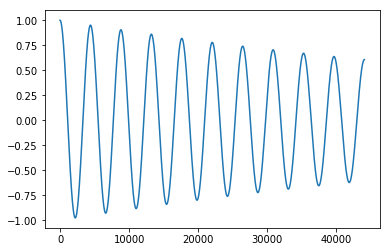

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure()
_ = plt.plot(output)

Now, if you want to hear what you just obtained, Python provides a nice module called [sounddevice](https://pypi.python.org/pypi/sounddevice) (thanks to [StackOverflow](https://stackoverflow.com/a/37423879) for the tip!). It just lets you play the array at the sampling rate you specify, without the need to worry about scaling the output between -1 and 1. 

I don't recommend you try and play the output we just obtained. Even if your audio gear were good enough to play 10 Hz, you probably would not be able to hear it. That's because [humans](https://en.wikipedia.org/wiki/Hearing_range#Humans) generally hear sounds between 20 Hz and 20 kHz (a bit less, if you are not young anymore and like to go to the disco...)

Therefore, try with a nice A at 440 Hz, to start with. Note that 44100 below represents the sampling rate, 44.1 kHz. 

In [4]:
import sounddevice as sd

sd.play(sho(440,1), 44100)

[Here](http://blog.albertotorin.it/files/sho-python/sho440.wav) is the output in wav file format. If you want to try the code yourself, you can download it from my [finite difference repository](https://github.com/atorin/FiniteDifferenceSchemes) on Github.